### Image Classification with a 2 layer FCN

In [10]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plttrace
import torchvision.transforms as transforms

In [2]:
# Setting GPU flag
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 1e-3

In [11]:
mnist_train = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [12]:
# data loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=False)

In [18]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [20]:
model = Net(input_size, hidden_size, num_classes).to(device)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
# Training
loss_arr = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward
        output = model(images)
        loss = loss_fn(output, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: ",epoch)
    loss_arr.append(loss)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9


In [24]:
# Testing
with torch.no_grad():
    c = 0
    t = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        t += labels.size(0)
        c += (predicted == labels).sum().item()
        
    print("Accuracy: ",100*c/t)

Accuracy:  98.01


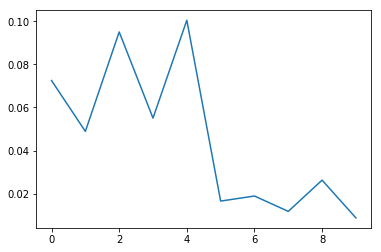

In [25]:
plt.plot(loss_arr)